In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read suicide data
data = pd.read_csv('who_suicide_statistics.csv')
data.head(5)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


# Data Wrangling

In [3]:
# Print summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [4]:
# 6 columns, 43776 rows
data.shape

(43776, 6)

In [5]:
# counts total row in each col. that have null values
# note: all the na columns are type Object
data.isna().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
# From above we can see that suicides no and population has null values.
# fill the null values with zero using 'fillna'
data = data.fillna(0)
# Now, we have no null columns!
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [7]:
# The different age groups
data['age'].unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [8]:
# lists the different countries
data['country'].unique()

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

In [9]:
# the Number of different Countries our dataset is from
data['country'].nunique()
# Our dataset is from 141 different Countries

141

In [10]:
# The different country groups
data['year'].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 1983, 1984,
       2016, 1979, 1980, 1981, 1982], dtype=int64)

In [11]:
# Replace 0 values with, NA
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

# replace Na values with, mean value
mean_value=data['population'].mean()

data['population']=data['population'].fillna(mean_value)

In [12]:
# do same for Suicides
# replace Na values with, mean value
mean_value=data['suicides_no'].mean()

data['suicides_no']=data['suicides_no'].fillna(mean_value)

In [13]:
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

# Which year has the most suicides

In [14]:
data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

Year Which Has Highest suicides_no :  1994
Year Which Has Lowest suicides_no  :  1987


,33128,29
country,Russian Federation,Albania
year,1994,1987
sex,male,female
age,35-54 years,75+ years
suicides_no,22338.0,1.0
population,19044200.0,35600.0


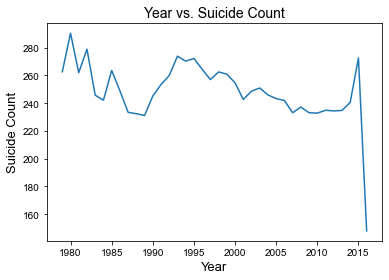

In [15]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('year')['suicides_no'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year vs. Suicide Count",fontsize = 14)
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

# Which Country has the most vs least suicides

In [16]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the country with high and low suicide
    print("Country Which Has Highest "+ x + " : ",data['country'][high_index])
    print("Country Which Has Lowest "+ x + "  : ",data['country'][min_index])
    return pd.concat([low,high],axis = 1)

find_minmax('suicides_no')

Country Which Has Highest suicides_no :  Russian Federation
Country Which Has Lowest suicides_no  :  Albania


,29,33128
country,Albania,Russian Federation
year,1987,1994
sex,female,male
age,75+ years,35-54 years
suicides_no,1.0,22338.0
population,35600.0,19044200.0


In [17]:
# Create new column to calculate suicide per population
# calculate mean of suicides_no col
meanSuicide = data['suicides_no'].mean()
# calculate mean of pop. col
meanPop = data['population'].mean()

  
# drops any Na rows
data = data.dropna()    
    
# Replace 0 or NaN suicides_no, with the mean Suicide    
data['suicides_no'] = data['suicides_no'].replace(np.NAN,meanSuicide)

# Replace 0 or NaN populations, with the mean Populations
data['population'] = data['population'].replace(np.NAN,meanPop)
data['population'] = data['population'].replace(0,meanPop)

In [18]:
data['suicide_per_pop'] = data.apply(lambda row: row.suicides_no / row.population, axis = 1) 

data.tail(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop
43773,Zimbabwe,1990,male,5-14 years,6.0,1.456536e+06,0.000004
43774,Zimbabwe,1990,male,55-74 years,74.0,1.456536e+06,0.000051
43775,Zimbabwe,1990,male,75+ years,13.0,1.456536e+06,0.000009


In [19]:
find_minmax('suicide_per_pop')

Country Which Has Highest suicide_per_pop :  Rodrigues
Country Which Has Lowest suicide_per_pop  :  Egypt


,12993,32351
country,Egypt,Rodrigues
year,2005,2004
sex,male,male
age,5-14 years,75+ years
suicides_no,1.0,249.106328
population,9543088.0,259.0
suicide_per_pop,0.0,0.9618


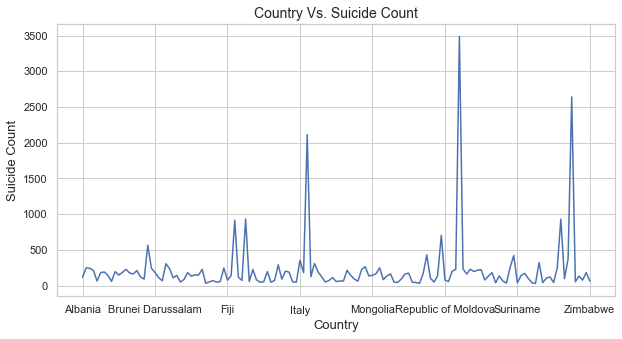

In [20]:
# year-wise analysis of mean number sucidies of each year
            # x             #y
data.groupby('country')['suicides_no'].mean().plot()

#info = pd.DataFrame(data['country'].sort_values(ascending = False))

#setup the title and labels of the figure.
plt.title("Country Vs. Suicide Count",fontsize = 14)
plt.xlabel('Country',fontsize = 13)
plt.ylabel('Suicide Count',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

# Are certain age groups more inclined to suicide?

In [21]:
sample = data.sample(3)
sample

,country,year,sex,age,suicides_no,population,suicide_per_pop
38617,Syrian Arab Republic,2001,female,25-34 years,249.106328,1.456536e+06,0.000171
33376,Russian Federation,2015,female,55-74 years,1062.000000,1.828058e+07,0.000058
229,Albania,2004,female,25-34 years,11.000000,2.223890e+05,0.000049


In [22]:
 # grabs first 2 chars from Age Column
data['AgeNum'] = data['age'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [23]:
# creates Age Categories
def AgeGroup(x):
    if(x >= 60):
        return "Elderly"
    elif(x >= 30):
        return "Middle_Aged_Adults"
    elif(x >= 18):
        return "Adults"
    else:
        return "Adolescent"
# Map each row in the Col to the AgeGroup Method
data['AgeCategory'] = data['AgeNum'].map(lambda x: AgeGroup(x))
# convert it back to type String
data['AgeCategory'] = data['AgeCategory'].astype(str)
data['AgeCategory'].tail(3)

43773            Adolescent
43774    Middle_Aged_Adults
43775               Elderly
Name: AgeCategory, dtype: object

In [24]:
data['AgeNum'] .tail(3)

43773     5
43774    55
43775    75
Name: AgeNum, dtype: int32

In [25]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931,35,Middle_Aged_Adults


Text(5.960000000000001, 0.5, 'Suicide Count')

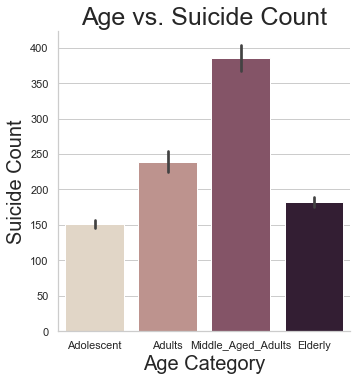

In [26]:
sns.catplot(x="AgeCategory", y="suicides_no",palette="ch:.25", kind="bar",data=data);

plt.title('Age vs. Suicide Count',size=25)
plt.xlabel('Age Category',size=20)
plt.ylabel('Suicide Count',size=20)

# What is the relationship between gender and number of suicides

In [27]:
# there is an equal number of Males & Females in our data
data['sex'].value_counts()

female    21888
male      21888
Name: sex, dtype: int64

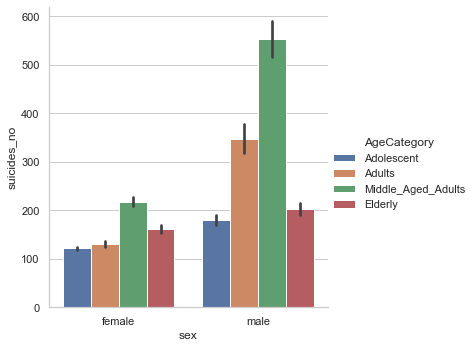

In [28]:
sns.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

# Machine Learning - Multiple Linear Regression Model

In [29]:
data.head(3)

,country,year,sex,age,suicides_no,population,suicide_per_pop,AgeNum,AgeCategory
0,Albania,1985,female,15-24 years,249.106328,277900.0,0.000896,15,Adolescent
1,Albania,1985,female,25-34 years,249.106328,246800.0,0.001009,25,Adults
2,Albania,1985,female,35-54 years,249.106328,267500.0,0.000931,35,Middle_Aged_Adults


In [30]:
newData= data.loc[:,['year','sex','AgeNum','suicides_no']]
newData.head(3)

,year,sex,AgeNum,suicides_no
0,1985,female,15,249.106328
1,1985,female,25,249.106328
2,1985,female,35,249.106328


In [31]:
X = newData.iloc[:, :-1].values # grab every col except last
y = newData.iloc[:, -1].values # grab last col

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
# the Gender feature, is now encoded using 0's & 1's
X

array([[1.0, 0.0, 1985, 15],
       [1.0, 0.0, 1985, 25],
       [1.0, 0.0, 1985, 35],
       ...,
       [0.0, 1.0, 1990, 5],
       [0.0, 1.0, 1990, 55],
       [0.0, 1.0, 1990, 75]], dtype=object)

In [34]:
y

array([249.10632817, 249.10632817, 249.10632817, ...,   6.        ,
        74.        ,  13.        ])

In [35]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

In [36]:
# Train Multiple Linear Regression model on training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [37]:
# we are predicting the suicide count given certain demographics

# A 25 year old male, in 2001 
# suicide count of about 149.
print(regressor.predict([[1,0,2001,25]]))

[148.97658107]
